In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import healpy as hp

In [5]:
# download raw data

planck30 = hp.read_map('../Desktop/LFI_SkyMap_030_1024_R2.01_full.fits')
planck44 = hp.read_map('../Desktop/LFI_SkyMap_044_1024_R2.01_full.fits')
planck70 = hp.read_map('../Desktop/LFI_SkyMap_070_1024_R2.01_full.fits')
planck100 = hp.read_map('../Desktop/HFI_SkyMap_100_2048_R2.02_full.fits')
planck143 = hp.read_map('../Desktop/HFI_SkyMap_143_2048_R2.02_full.fits')
planck217 = hp.read_map('../Desktop/HFI_SkyMap_217_2048_R2.02_full.fits')
planck353 = hp.read_map('../Desktop/HFI_SkyMap_353_2048_R2.02_full.fits')

NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


/Users/louiscroquette/anaconda/lib/python3.6/site-packages/healpy/fitsfunc.py:372: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


In [6]:
# lower the resolution of the maps

planck30 = hp.ud_grade(planck30, 512)
planck44 = hp.ud_grade(planck44, 512)
planck70 = hp.ud_grade(planck70, 512)
planck100 = hp.ud_grade(planck100, 512)
planck143 = hp.ud_grade(planck143, 512)
planck217 = hp.ud_grade(planck217, 512)
planck353 = hp.ud_grade(planck353, 512)

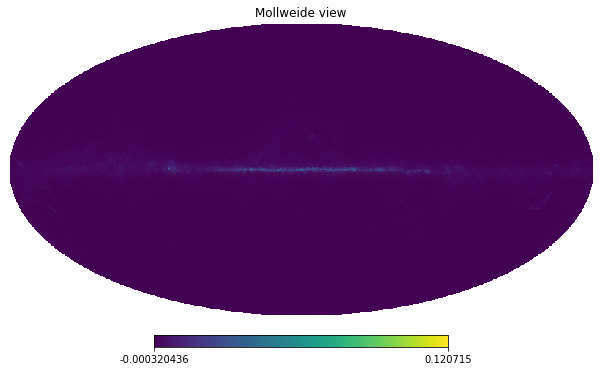

In [7]:
# example plot of raw data

hp.mollview(planck217, nest=False)

In [8]:
# implement the Lagrange method

map_array = np.array([planck30, planck44, planck70, planck100, planck143, planck217, planck353])

# define weighted map sum function

def map_sum(w):
    """Given an array of weights w,returns a weighted sum of the maps"""
    return w@map_array

In [9]:
def get_H():
    i = 0
    j = 0
    H = np.zeros((len(map_array), len(map_array)))
    for m in map_array:
        j = 0
        for n in map_array:
            product = m*n
            product_sum = np.sum(product)
            H[i, j] = product_sum
            j+=1
        i+=1
    return H

In [10]:
H = get_H()

In [11]:
e = np.ones(len(map_array))

In [12]:
w = (np.linalg.inv(H)@e) / (e.T@H@e)

In [13]:
print(w)
print(np.sum(w))
print(w/np.sum(w))
opt_map = map_sum(w/np.sum(w))
print(opt_map)

[-0.00288621  0.0104061  -0.0195659   0.01101462  0.02525271 -0.00272827
 -0.00060967]
0.02088339220663778
[-0.13820596  0.4982956  -0.93691211  0.52743458  1.20922469 -0.13064282
 -0.02919399]
[-1.65588589e-04 -7.40888188e-05 -1.31758658e-05 ...  9.81450736e-05
  1.01674421e-04  9.97091627e-05]


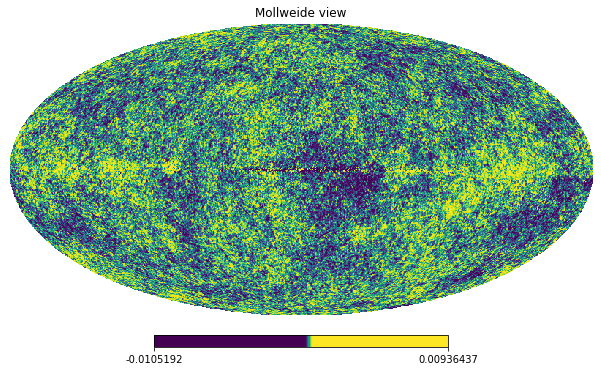

In [14]:
hp.mollview(opt_map, nest=False, norm='hist')

In [134]:
#Louis' part starts here

In [135]:
sph_map_array = []
for i in map_array: 
    sph_map_array.append(hp.sphtfunc.map2alm(i, lmax = 1024))

In [136]:
def wLCalc(cL, e):
    return (np.linalg.inv(cL)@e) / (e.T@np.linalg.inv(cL)@e)

In [137]:
cLArray = np.zeros((7,7,1025))

In [138]:
countI = 0
countJ = 0
for i in map_array:
    countJ = 0
    for j in map_array:
        element = hp.sphtfunc.anafast(i, map2 = j, lmax = 1024)
        #print(element)
        cLArray[countI, countJ] = element
        countJ += 1
    countI += 1

In [139]:
wLArray = np.zeros((7,1025))

In [140]:
countI = 0
while countI < 1025:
    wLArray[:,countI] = wLCalc(cLArray[:,:,countI], e)
    countI += 1
print(wLArray)
wLArray.shape

[[ 9.35654659e-01  1.91193108e-01 -1.12571892e-01 ...  5.49044948e-01
   5.54920109e-01  5.55583794e-01]
 [ 2.66319648e+00 -3.78540990e-01 -1.75429210e+00 ...  4.07048467e-01
   3.87838270e-01  3.86565042e-01]
 [-2.20124430e+00 -4.02387280e-01  2.14349118e+01 ... -3.92754107e-02
   6.04652600e-03 -1.60330247e-02]
 ...
 [ 1.59335948e+01  1.06982187e+00 -1.58876201e+01 ...  1.57996113e-01
   1.33398620e-01  1.70582450e-01]
 [-3.98292948e+00 -1.67694145e-01  1.04344090e+01 ...  3.25517699e-02
   5.50780027e-02  4.09976657e-02]
 [ 1.06350712e-01 -4.02657690e-02 -7.94435406e-01 ... -7.11040123e-03
  -8.84797774e-03 -8.35682457e-03]]


(7, 1025)

In [141]:
almArray = []

In [142]:
lCounter = 0
while lCounter < 1025:
    mCounter = 0
    mMax = lCounter+1
    print("We are at l = ", lCounter)
    while mCounter < mMax:
        almList = np.asarray([sph_map_array[0][mCounter], sph_map_array[1][mCounter], sph_map_array[2][mCounter], sph_map_array[3][mCounter], sph_map_array[4][mCounter], sph_map_array[5][mCounter], sph_map_array[6][mCounter]])
        newAlm = almList.T@wLArray[:,lCounter]
        almArray.append(newAlm)
        mCounter += 1
    lCounter += 1

We are at l =  0
We are at l =  1
We are at l =  2
We are at l =  3
We are at l =  4
We are at l =  5
We are at l =  6
We are at l =  7
We are at l =  8
We are at l =  9
We are at l =  10
We are at l =  11
We are at l =  12
We are at l =  13
We are at l =  14
We are at l =  15
We are at l =  16
We are at l =  17
We are at l =  18
We are at l =  19
We are at l =  20
We are at l =  21
We are at l =  22
We are at l =  23
We are at l =  24
We are at l =  25
We are at l =  26
We are at l =  27
We are at l =  28
We are at l =  29
We are at l =  30
We are at l =  31
We are at l =  32
We are at l =  33
We are at l =  34
We are at l =  35
We are at l =  36
We are at l =  37
We are at l =  38
We are at l =  39
We are at l =  40
We are at l =  41
We are at l =  42
We are at l =  43
We are at l =  44
We are at l =  45
We are at l =  46
We are at l =  47
We are at l =  48
We are at l =  49
We are at l =  50
We are at l =  51
We are at l =  52
We are at l =  53
We are at l =  54
We are at l =  55
We

We are at l =  447
We are at l =  448
We are at l =  449
We are at l =  450
We are at l =  451
We are at l =  452
We are at l =  453
We are at l =  454
We are at l =  455
We are at l =  456
We are at l =  457
We are at l =  458
We are at l =  459
We are at l =  460
We are at l =  461
We are at l =  462
We are at l =  463
We are at l =  464
We are at l =  465
We are at l =  466
We are at l =  467
We are at l =  468
We are at l =  469
We are at l =  470
We are at l =  471
We are at l =  472
We are at l =  473
We are at l =  474
We are at l =  475
We are at l =  476
We are at l =  477
We are at l =  478
We are at l =  479
We are at l =  480
We are at l =  481
We are at l =  482
We are at l =  483
We are at l =  484
We are at l =  485
We are at l =  486
We are at l =  487
We are at l =  488
We are at l =  489
We are at l =  490
We are at l =  491
We are at l =  492
We are at l =  493
We are at l =  494
We are at l =  495
We are at l =  496
We are at l =  497
We are at l =  498
We are at l 

We are at l =  889
We are at l =  890
We are at l =  891
We are at l =  892
We are at l =  893
We are at l =  894
We are at l =  895
We are at l =  896
We are at l =  897
We are at l =  898
We are at l =  899
We are at l =  900
We are at l =  901
We are at l =  902
We are at l =  903
We are at l =  904
We are at l =  905
We are at l =  906
We are at l =  907
We are at l =  908
We are at l =  909
We are at l =  910
We are at l =  911
We are at l =  912
We are at l =  913
We are at l =  914
We are at l =  915
We are at l =  916
We are at l =  917
We are at l =  918
We are at l =  919
We are at l =  920
We are at l =  921
We are at l =  922
We are at l =  923
We are at l =  924
We are at l =  925
We are at l =  926
We are at l =  927
We are at l =  928
We are at l =  929
We are at l =  930
We are at l =  931
We are at l =  932
We are at l =  933
We are at l =  934
We are at l =  935
We are at l =  936
We are at l =  937
We are at l =  938
We are at l =  939
We are at l =  940
We are at l 

In [143]:
npALM = np.asarray(almArray)

In [144]:
new_sph_map = hp.sphtfunc.alm2map(npALM, nside = 1024,lmax = 1024)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


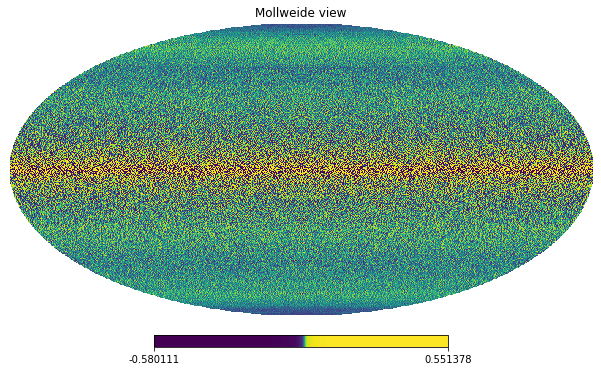

In [145]:
hp.mollview(new_sph_map, nest=False, norm='hist')